In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [6]:
data=pdr.get_data_yahoo('TSLA','2010-01-01','2024-01-01')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400


In [8]:
data.shape

(3400, 6)

In [10]:
data=data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [12]:
data=data.drop(['Date','Adj Close'], axis=1)

In [14]:
data

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
3395,256.760010,258.220001,251.369995,252.539993,93249800
3396,254.490005,257.970001,252.910004,256.609985,86892400
3397,258.350006,263.339996,257.519989,261.440002,106494400
3398,263.660004,265.130005,252.710007,253.179993,113619900


In [16]:
# data=data.drop(['Open','High','Low','Volume'], axis=1)
data

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
3395,256.760010,258.220001,251.369995,252.539993,93249800
3396,254.490005,257.970001,252.910004,256.609985,86892400
3397,258.350006,263.339996,257.519989,261.440002,106494400
3398,263.660004,265.130005,252.710007,253.179993,113619900


In [18]:
ma100=data.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3395    241.505100
3396    241.477999
3397    241.553799
3398    241.571099
3399    241.558899
Name: Close, Length: 3400, dtype: float64

In [20]:
ma200=data.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3395    227.70775
3396    228.12360
3397    228.55840
3398    228.90800
3399    229.24815
Name: Close, Length: 3400, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

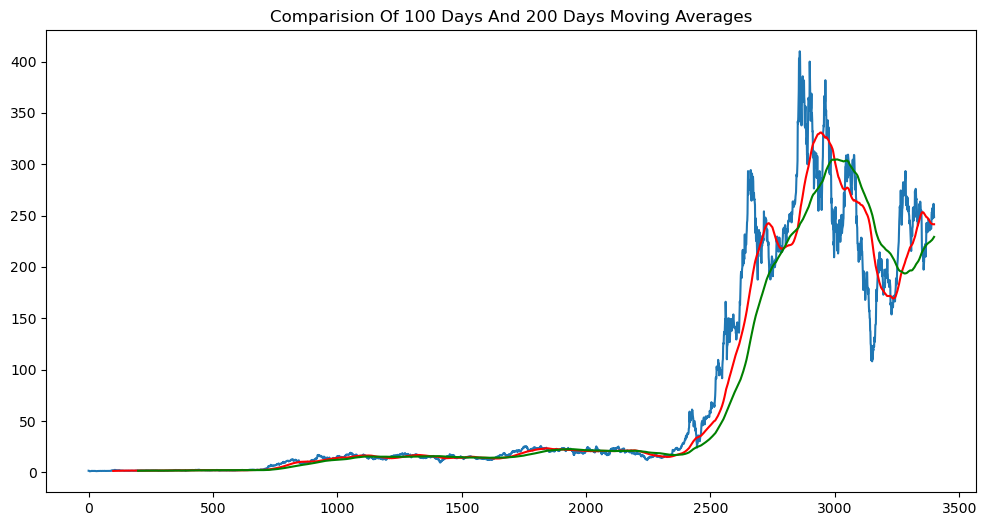

In [22]:
plt.figure(figsize = (12,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [24]:
# from sklearn.model_selection import train_test_split
data.shape

(3400, 5)

In [26]:
# data_train,data_test=train_test_split(data,test_size=0.3,random_state=2)
split_index = int(len(data) * 0.70)

# Create training and testing datasets
data_train = pd.DataFrame(data['Close'][:split_index])
data_test = pd.DataFrame(data['Close'][split_index:])

In [28]:
data_train.shape,data_test.shape

((2380, 1), (1020, 1))

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [32]:
data_train_array=scaler.fit_transform(data_train)
data_train_array
# data_train_array.shape

array([[0.02191227],
       [0.02174975],
       [0.01668473],
       ...,
       [0.86698267],
       [0.87684173],
       [0.90205848]])

In [34]:
x_train = []
y_train = []

for i in range(100,data_train_array.shape[0]):
    x_train.append(data_train_array[i-100: i])
    y_train.append(data_train_array[i,0])

x_train, y_train = np.array(x_train) , np.array(y_train)

In [36]:
x_train.shape

(2280, 100, 1)

In [210]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [38]:
from keras.layers import Dense,Dropout, LSTM
from keras.models import Sequential

In [39]:
model = Sequential()
model.add(LSTM(units =50, activation ='relu', return_sequences = True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units =60, activation ='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units =80, activation ='relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units =120, activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


C:\Users\uditp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer='adam' , loss='mean_squared_error')
model.fit(x_train,y_train , epochs=5)

Epoch 1/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 17s 145ms/step - loss: 0.1058
Epoch 2/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - loss: 0.0129
Epoch 3/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - loss: 0.0109
Epoch 4/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - loss: 0.0090
Epoch 5/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - loss: 0.0096


In [45]:
model.save('my_model2.keras')

In [46]:
data_test

,Close
2380,23.513332
2381,23.978666
2382,23.892668
2383,25.433332
2384,25.266001
...,...
3395,252.539993
3396,256.609985
3397,261.440002
3398,253.179993


In [47]:
past_100_days = data_train.tail(100)
final_df = pd.concat([past_100_days, data_test], ignore_index=True)

In [48]:
final_df

,Close
0,17.045334
1,17.344667
2,17.658667
3,15.254667
4,15.202667
...,...
1115,252.539993
1116,256.609985
1117,261.440002
1118,253.179993


In [49]:
input_data=scaler.fit_transform(final_df)

In [50]:
input_data.shape

(1120, 1)

In [51]:
x_test =[]
y_test =[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [52]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1020, 100, 1)
(1020,)


In [53]:
y_pred=model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step


In [54]:
# y_pred.shape
# y_test
y_pred

array([[0.03400832],
       [0.03401652],
       [0.03402413],
       ...,
       [0.56498575],
       [0.5670161 ],
       [0.56911707]], dtype=float32)

In [55]:
scaler.scale_

array([0.00252604])

In [56]:
scale_factor=1/0.05953089
y_pred=y_pred*scale_factor
y_test=y_test*scale_factor

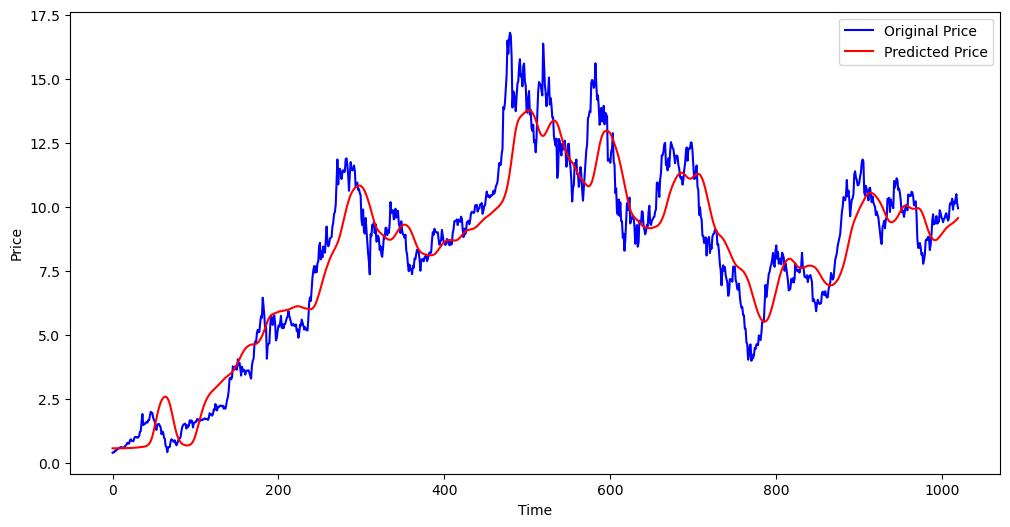

In [57]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label ='Original Price')
plt.plot(y_pred,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()